# Othello game bitboard

I'll use this Jupyter notebook to explore Othello bitboards and understand move generation, etc. 

Conveniently, as the Othello board is 64 squares, all pieces from a player fit into a single 64-bit integer (called a bitboard). So to handle the whole position at any moment of the game, only 2 64-bit integers are enough.

I've been inspired by _Cameron Browne_ paper called _Bitboard methods for games_. I'll use his notation in the following notebook.

I developed a specific Python3 module which generates SVG Othello board diagrams. It's convenient to use such a Jupyter notebook to graphically understand algorithms.

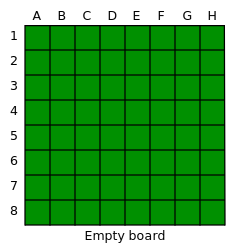

In [1]:
from IPython.display import SVG, HTML

# my othello module
import othello

# board width & heigth set here
board_width = board_height = 250

# create an empty SVG board
board = othello.SVGBoard(board_width, board_height)
board.draw_legend('Empty board')

# use SVG INotebook display facility to print out embeded SVG 
board.close()
SVG(board.doc.tags)

The same board using algebric notation to add pieces.

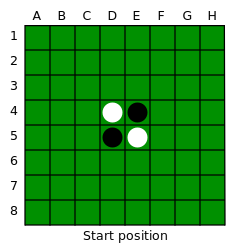

In [2]:
# reset previously defined board
board.reset()

# draw pieces
board.draw_piece_from_algebric("D4", othello.Color.white)
board.draw_piece_from_algebric("E5", othello.Color.white)
board.draw_piece_from_algebric("E4", othello.Color.black)
board.draw_piece_from_algebric("D5", othello.Color.black)
board.draw_legend('Start position')

# use SVG INotebook display facility to print out embeded SVG 
board.close()
SVG(board.doc.tags)

The 8x8 Othello board is conveniently modelled using a 64-bit integer called a bitboard. Pieces can be drawn also using a 64-bit integer.

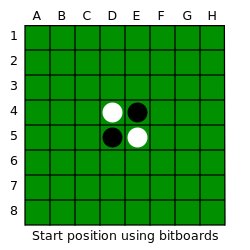

In [3]:
board.reset()

# draw pieces
white = othello.Bitboard(0b00000000_00000000_00000000_00010000_00001000_00000000_00000000_00000000)
black = othello.Bitboard(0b00000000_00000000_00000000_00001000_00010000_00000000_00000000_00000000)

board.draw_pieces_from_bitboard(white, othello.Color.white)
board.draw_pieces_from_bitboard(black, othello.Color.black)

board.draw_legend('Start position using bitboards')

# use SVG INotebook display facility to print out embeded SVG 
board.close()
SVG(board.doc.tags)

## Operations on bitboards


### Union (bitwise &)
The bitwise **AND** operation between 2 bitboards gives a resulting one which is the union of all pieces from both players.

In [4]:
# create 3 boards for displaying operations on bitboards. We'll reuse them across cells
board1 = othello.SVGBoard(board_width, board_height, False)
board2 = othello.SVGBoard(board_width, board_height, False)
board3 = othello.SVGBoard(board_width, board_height, False)


bb1 = othello.Bitboard(0b00000000_00000000_00111100_00100100_00100100_00111100_00000000_00000000)
bb2 = othello.Bitboard(0b00000000_00000000_00000000_00011000_00011000_00000000_00000000_00000000)

board1.draw_pieces_from_bitboard(bb1, othello.Color.black)
board2.draw_pieces_from_bitboard(bb2, othello.Color.black)
board3.draw_pieces_from_bitboard(bb1|bb2, othello.Color.white, 0.1)

board1.close()
board2.close()
board3.close()

# print boards side by side
display(HTML(othello.SVGBoard.combine(board1.doc.tags, board2.doc.tags, board3.doc.tags)))


### Intersection
The bitwise **OR** operation between 2 bitboards gives a resulting one which is the intersection of all pieces from both players (which by abiding to Othello's game rules, should also be empty, but is used to generate moves)

In [5]:
# reset boards
board1.reset(False)
board2.reset(False)
board3.reset(False)

bb3 = othello.Bitboard(0b00000000_00000000_00111100_00000000_00000000_00000000_00000000_00000000)

board1.draw_pieces_from_bitboard(bb1, othello.Color.black)
board2.draw_pieces_from_bitboard(bb3, othello.Color.black)
board3.draw_pieces_from_bitboard(bb1&bb3, othello.Color.white, 0.1)

board1.close()
board2.close()
board3.close()

# print boards side by side
display(HTML(othello.SVGBoard.combine(board1.doc.tags, board2.doc.tags, board3.doc.tags)))

### Negate
The unary negate operation applied to a bitboard gives a resulting one for which each bit is flipped.

In [6]:
# reset 2 boards
board1.reset(False)
board3.reset(False)

board1.draw_pieces_from_bitboard(bb3, othello.Color.black)
board3.draw_pieces_from_bitboard(~bb3, othello.Color.white, 0.1)

board1.close()
board3.close()


# print both side by side
display(HTML(othello.SVGBoard.combine(board1.doc.tags, board3.doc.tags)))



### Exclusive OR
The bitwise **XOR** operation between 2 bitboards gives a resulting one for which bits are set in first but not in the second.

In [7]:
# reset boards
board1.reset(False)
board2.reset(False)
board3.reset(False)

bb3 = othello.Bitboard(0b00000000_00000000_00111100_00000000_00000000_00000000_00000000_00000000)

board1.draw_pieces_from_bitboard(bb1, othello.Color.black)
board2.draw_pieces_from_bitboard(bb3, othello.Color.black)
board3.draw_pieces_from_bitboard(bb1^bb3, othello.Color.white, 0.1)

board1.close()
board2.close()
board3.close()

# print boards side by side
display(HTML(othello.SVGBoard.combine(board1.doc.tags, board2.doc.tags, board3.doc.tags)))

### Shift operations
The shift operations are used to identify direct neighbours of a piece, in one of the 8 possible cardinal directions clockwise: **N, NE, E, SE, S, SW, W, NW**. It boils down to left or right shifting a bit for a specific number of positions:

* N: left shift 8
* NE: left shift 7
* E: right shift 1
* SE: right shift 9
* S: right shift 8
* SE: right shift 7
* W: left shift 1 (or right shift -1)
* NW: left shift 9

Note: right shift is equivalent of negative left shift and conversely.

In [8]:
# reset 2 boards
board1.reset(False)
board3.reset(False)

bb4 = othello.Bitboard(0b00000000_00000000_00000000_00010000_00000000_00000000_00000000_00000000)

board1.draw_pieces_from_bitboard(bb4, othello.Color.black)

# follow cardinal directions clockwise

# N
board1.draw_pieces_from_bitboard(bb4 >> -8 , othello.Color.white, 0.1)

# NE
board1.draw_pieces_from_bitboard(bb4 >> -7 , othello.Color.white, 0.1)

# E
board1.draw_pieces_from_bitboard(bb4 >> 1 , othello.Color.white, 0.1)

# SE
board1.draw_pieces_from_bitboard(bb4 >> 9 , othello.Color.white, 0.1)

# S
board1.draw_pieces_from_bitboard(bb4 >> 8 , othello.Color.white, 0.1)

# SW
board1.draw_pieces_from_bitboard(bb4 >> 7 , othello.Color.white, 0.1)

# W
board1.draw_pieces_from_bitboard(bb4 >> -1 , othello.Color.white, 0.1)

# NE
board1.draw_pieces_from_bitboard(bb4 >> -9 , othello.Color.white, 0.1)

board1.close()


# print both side by side
display(HTML(othello.SVGBoard.combine(board1.doc.tags)))

Same using the **adjacent()** Bitboard class method.

In [9]:
# reset board
board1.reset(False)

# draw a middle piece
board1.draw_pieces_from_bitboard(bb4, othello.Color.black)

# draw adjacent squares
board1.draw_pieces_from_bitboard(bb4.adjacent(), othello.Color.white, 0.1)

# print both side by side
board1.close()
display(HTML(othello.SVGBoard.combine(board1.doc.tags)))

But this isn't working for border squares due to shifts. It's needed to **&** with crop values to get rid of candidates which are shifted leftmost or rightmost.

In [10]:
# reset board
board1.reset(False)

# draw a border piece
bb5 = othello.Bitboard(0b10000001_00000000_00000000_00000000_00000000_00000000_00000000_10000001)
board1.draw_pieces_from_bitboard(bb5, othello.Color.black)

# draw adjacent squares
board1.draw_pieces_from_bitboard(bb5.adjacent(), othello.Color.white, 0.1)

# print both side by side
board1.close()
display(HTML(othello.SVGBoard.combine(board1.doc.tags)))


The union of all shifts for all pieces gives all neighbours of a bitboard. Intersecting with empty squares gives the list of close neighbours for all pieces.

In [11]:
# reset board
board1.reset(False)

# example position
bits_b = othello.Bitboard(0b01000000_11011110_01000110_00101110_00011010_00011100_00000000_00000000)
bits_w = othello.Bitboard(0b00111110_00100000_00111000_00010000_00100000_00000000_00000000_00000000)

board1.draw_pieces_from_bitboard(bits_b, othello.Color.black)
board1.draw_pieces_from_bitboard(bits_w, othello.Color.white)

# draw all adjacent squares
full = bits_b | bits_w
empty = ~full
adjacent = full.adjacent()
neighbourhood = adjacent & empty
   
board1.draw_pieces_from_bitboard(neighbourhood, othello.Color.red, 0.1)   

board1.close()

# print both side by side
display(HTML(othello.SVGBoard.combine(board1.doc.tags)))


In [12]:
# identify moves algorithm
# bit_p = current player
# bit_o = opponent player
def possible_moves(bits_p, bits_o):
    moves = othello.Bitboard.zero()    
    
    for dir in othello.Bitboard.directions.keys():
        candidates = bits_o & (bits_p @ dir)
        while candidates != othello.Bitboard.zero():
            moves |= empty & (candidates @ dir)
            candidates = bits_o & (candidates @ dir)
            
    return moves


# reset board
board1.reset(False)

# draw last position in previous cell
board1.draw_pieces_from_bitboard(bits_b, othello.Color.black)
board1.draw_pieces_from_bitboard(bits_w, othello.Color.white)

# get all possible moves for white
moves = possible_moves(bits_w, bits_b)

board1.draw_pieces_from_bitboard(moves, othello.Color.red, 0.1)   

board1.close()

# print both side by side
display(HTML(othello.SVGBoard.combine(board1.doc.tags)))

Whenever a player can't move, the **possible_moves()** function returns an empty bitboard (== 0)

In [13]:
# reset board
board1.reset(False)

# example of a forfeit position for both players (from Wikipedia)
bits_b = othello.Bitboard(0b00000000_00000000_00000000_00000000_00000000_00000001_00000000_00000000)
bits_w = othello.Bitboard(0b11111111_11111111_11111111_11111110_11111100_11111100_11111110_11111111)

board1.draw_pieces_from_bitboard(bits_b, othello.Color.black)
board1.draw_pieces_from_bitboard(bits_w, othello.Color.white)

# get all possible moves for white
moves = possible_moves(bits_w, bits_b)
print(moves)

board1.draw_pieces_from_bitboard(moves, othello.Color.red, 0.1)   

board1.close()

# print both side by side
display(HTML(othello.SVGBoard.combine(board1.doc.tags)))

0000000000000000000000000000000000000000000000000000000000000000
